In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
auto_df = pd.read_csv("auto/imbalance_degree/normal/result/gini_accuracy_all_runs.csv")
auto_df["hierarchy"] = "auto"
samples_df = pd.read_csv("samples/imbalance_degree/normal/result/gini_accuracy_all_runs.csv")
samples_df = samples_df[samples_df["n"] == 1050]
samples_df["hierarchy"] = "normal"
flat_df = pd.read_csv("flat/imbalance_degree/normal/result/gini_accuracy_all_runs.csv")
flat_df["hierarchy"] = "flat"
hierarchy_df = pd.concat([flat_df, samples_df, auto_df])

In [3]:
hierarchy_df

,Method,R_e,A@e,RA@e,Run,n,f,max info loss,n_clusters,algorithm,n_components,gini,p value,hierarchy,mf
0,RF,1,0.320000,1.000000,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
1,RF,2,0.466667,1.314286,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
2,RF,3,0.560000,1.595238,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
3,RF,4,0.646667,1.917526,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
4,RF,5,0.706667,2.179245,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,CPI,5,0.730000,2.141553,1,1050,100,NaN,NaN,NaN,NaN,0.4,0.9,auto,0.2
2356,CPI,6,0.766667,2.326087,1,1050,100,NaN,NaN,NaN,NaN,0.4,0.9,auto,0.2
2357,CPI,7,0.776667,2.386266,1,1050,100,NaN,NaN,NaN,NaN,0.4,0.9,auto,0.2
2358,CPI,8,0.786667,2.457627,1,1050,100,NaN,NaN,NaN,NaN,0.4,0.9,auto,0.2


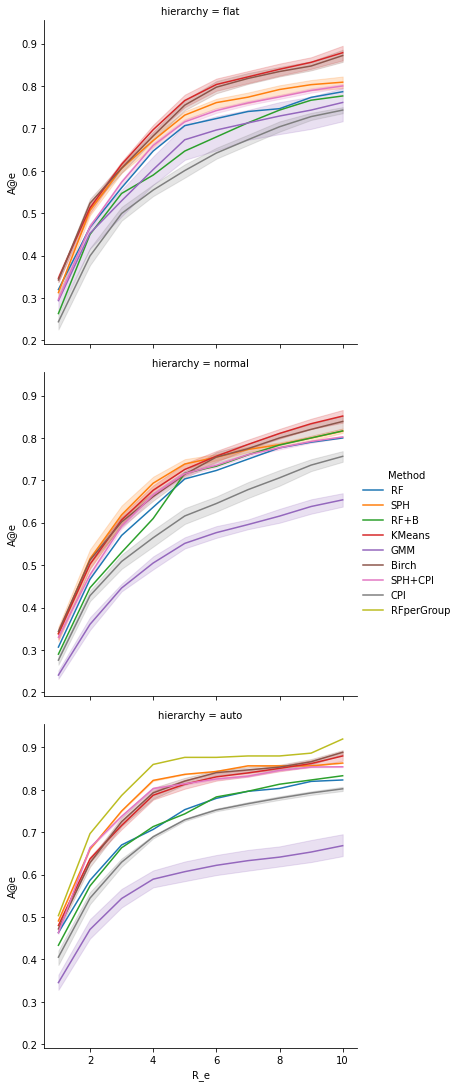

In [9]:
sns.relplot(data=hierarchy_df, x="R_e", y="A@e", hue="Method", row="hierarchy", kind="line")

In [3]:
parameters = ["max info loss", "gini", "p value", "n_clusters"]
methods_to_parameters = {
    "SPH+CPI": ["max info loss", "gini", "p value"],
    "SPH": ["max info loss"],
    "KMeans": ["n_clusters"],
    "Birch": ["n_clusters"],
    "GMM": ["n_clusters"],
    "CPI": ["gini", "p value"],
    "RF": [],
    "RF+B": []
}

In [4]:
best_result_df = pd.DataFrame()
for n in hierarchy_df["hierarchy"].unique():
    hierarchy_flat_df = hierarchy_df[hierarchy_df["hierarchy"] == n]
    # find best parameter for each method
    for method in hierarchy_flat_df["Method"].unique():
        if method == "RFperGroup":
            continue
        method_df = hierarchy_flat_df[hierarchy_flat_df["Method"] == method]
        #print(method_df)
        first_position_df = method_df[(method_df["R_e"] == 1)]
        best_method_result = first_position_df[first_position_df["A@e"] == first_position_df["A@e"].max()]
        for parameter in methods_to_parameters[method]:
            parameter_value = best_method_result[parameter].values[0]
            if not parameter_value:
                continue
            method_df = method_df[method_df[parameter] == parameter_value]
        print(method_df)
        best_result_df = pd.concat([best_result_df, method_df])
best_result_df

  Method  R_e       A@e      RA@e  Run     n    f  max info loss  n_clusters  \
0     RF    1  0.320000  1.000000    1  1050  100            NaN         NaN   
1     RF    2  0.466667  1.314286    1  1050  100            NaN         NaN   
2     RF    3  0.560000  1.595238    1  1050  100            NaN         NaN   
3     RF    4  0.646667  1.917526    1  1050  100            NaN         NaN   
4     RF    5  0.706667  2.179245    1  1050  100            NaN         NaN   
5     RF    6  0.723333  2.267281    1  1050  100            NaN         NaN   
6     RF    7  0.740000  2.373874    1  1050  100            NaN         NaN   
7     RF    8  0.746667  2.424107    1  1050  100            NaN         NaN   
8     RF    9  0.773333  2.650862    1  1050  100            NaN         NaN   
9     RF   10  0.786667  2.775424    1  1050  100            NaN         NaN   

  algorithm  n_components  gini  p value hierarchy  mf  
0       NaN           NaN   NaN      NaN      flat NaN  
1    

,Method,R_e,A@e,RA@e,Run,n,f,max info loss,n_clusters,algorithm,n_components,gini,p value,hierarchy,mf
0,RF,1,0.320000,1.000000,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
1,RF,2,0.466667,1.314286,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
2,RF,3,0.560000,1.595238,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
3,RF,4,0.646667,1.917526,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
4,RF,5,0.706667,2.179245,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,CPI,6,0.743333,1.816143,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.7,auto,0.2
2121,CPI,7,0.753333,1.884956,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.7,auto,0.2
2122,CPI,8,0.770000,2.017316,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.7,auto,0.2
2123,CPI,9,0.783333,2.136170,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.7,auto,0.2


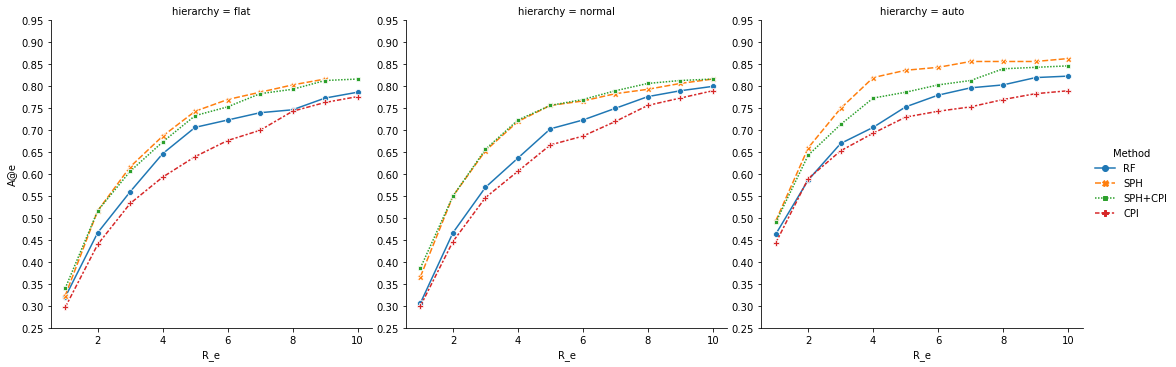

In [7]:
ax = sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "CPI"])], x="R_e", y="A@e", hue="Method", facet_kws={"sharey":False}, col="hierarchy", kind="line", markers=True, style="Method",col_wrap=3)
ax.set(yticks=[0.05*i for i in range(5, 20)])

Text(0, 0.5, 'A@1')

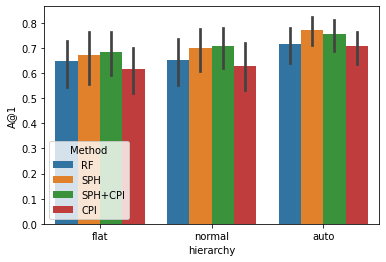

In [13]:
#ax = sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "CPI"])], x="R_e", y="A@e", hue="Method", col="hierarchy", kind="bar", markers=True, style="Method",col_wrap=2)
ax = sns.barplot(data=best_result_df[(best_result_df["R_e"] ==1) & (best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "CPI"]))], x="hierarchy", y="A@e", hue="Method")
ax.set_ylabel("A@1")

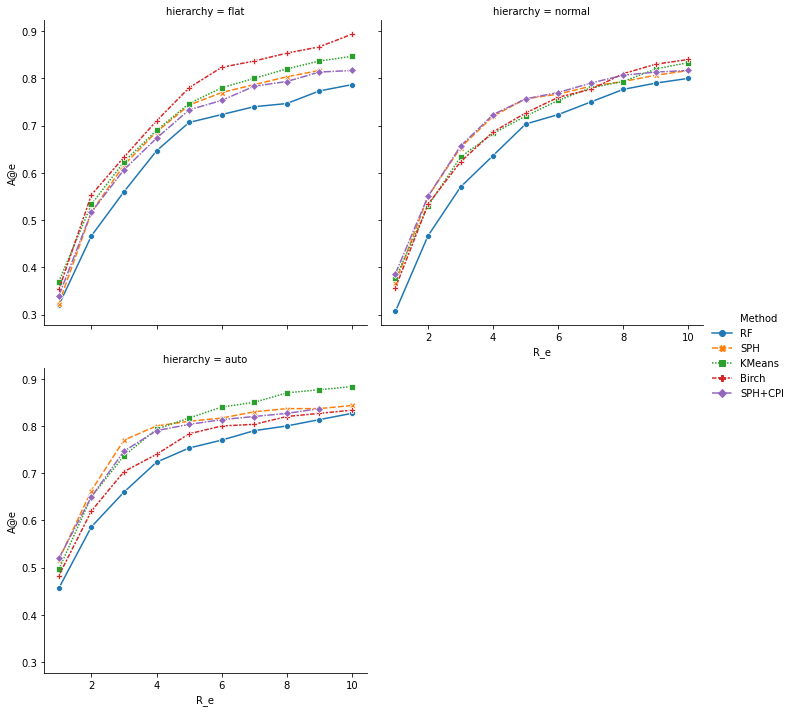

In [12]:
sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "KMeans", "Birch"])], x="R_e", y="A@e", hue="Method", style="Method", markers=True, col="hierarchy", kind="line", col_wrap=2)

Text(0, 0.5, 'Avg A@e')

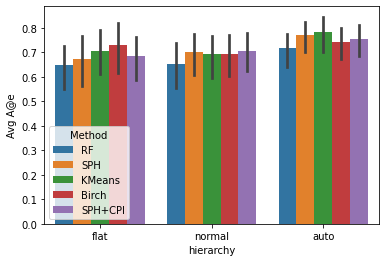

In [15]:
ax = sns.barplot(data=best_result_df[(best_result_df["R_e"] <=10) & (best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "KMeans", "Birch"]))], x="hierarchy", y="A@e", hue="Method")
ax.set_ylabel("Avg A@e")

In [17]:
best_parameter_df = pd.DataFrame()
for n in best_result_df["hierarchy"].unique():
    #print("--------------------------------------")
    #print(f"n={n}")
    best_n_samples = best_result_df[best_result_df["hierarchy"] == n]
    for method in best_n_samples["Method"].unique():
        param_df = best_n_samples[(best_n_samples["Method"] == method) & (best_n_samples["R_e"] == 1)][methods_to_parameters[method]]
        #print(f"Method {method} has best parameters:")
        #print(param_df)
        #print("--------------------------------------")
        param_df["Method"] = method
        #param_df["n"] = n
        param_df["hierarchy"] = n
        best_parameter_df = pd.concat([best_parameter_df, param_df])
    
best_parameter_df

,Method,hierarchy,max info loss,n_clusters,gini,p value
0,RF,flat,NaN,NaN,NaN,NaN
59,SPH,flat,0.35,NaN,NaN,NaN
77,RF+B,flat,NaN,NaN,NaN,NaN
167,KMeans,flat,NaN,45.0,NaN,NaN
307,Birch,flat,NaN,20.0,NaN,NaN
1877,SPH+CPI,flat,0.35,NaN,0.4,0.90
2137,CPI,flat,NaN,NaN,0.2,0.70
2386,SPH,normal,0.35,NaN,NaN,NaN
2406,RF,normal,NaN,NaN,NaN,NaN
2416,RF+B,normal,NaN,NaN,NaN,NaN
